In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import re
import matplotlib.pyplot as plt

# Recuento de mensajes totales

Función para cargar el archivo del chat

In [10]:
def load_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()
    return text

Función para procesar los mensajes del chat. Refactoriza los mensajes que tienen saltos de línea. Quita la fecha y hora de los mensajes

In [11]:
def process_chat_lines(file_path):
    messages = []

    for file in file_path:
        chat_text = load_text(file)
        current_message = ''

        chat_text = re.sub(r'[\u202f\u00a0]', ' ', chat_text)
        chat_lines = chat_text.split('\n')

        pattern = r'\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}\s?[ap]\.?\s?m\.? - '

        for line in chat_lines:
            if re.match(pattern, line):
                if current_message:
                    messages.append(current_message.strip())
                current_message = re.sub(pattern, '', line)
            else:
                current_message += ' ' + line.strip()

        if current_message:
            messages.append(current_message.strip())

    return messages


Total de mensajes enviados por cada persona, considerando elementos multimedia

In [4]:
def total_count_of_messages(chat_lines):
	json = {
		'Jeffrey': 0,
		'Romy': 0
	}

	for line in chat_lines:
		words = line.split(' ')
		if words[0] == 'Jeffrey':
			json['Jeffrey'] += 1
		elif words[0] == 'ROMINOVICH' or words[0] == 'Rominovich':
			json['Romy'] += 1

	return json

Total de mensajes de texto enviados por cada persona, sin considerar elementos multimedia

In [5]:
def total_count_of_text_messages(chat_lines):
	json = {
		'Jeffrey': 0,
		'Romy': 0,
        'Multimedia': 0
	}

	for line in chat_lines:
		words = line.split(':')
		if len(words) < 2:
			continue
		elif words[1] == ' <Multimedia omitido>':
		    json['Multimedia'] += 1
		elif words[0] == 'Jeffrey Monja':
			json['Jeffrey'] += 1
		elif words[0] == 'ROMINOVICH MI TODOPODEROSA 💜' or words[0] == 'Rominovich 💜':
			json['Romy'] += 1
	return json

Gráfico circular de recuento de mensajes totales

In [6]:
def count_of_messages_circular_graph(datos):
    names = list(datos.keys())
    values = list(datos.values())

    def func(pct, allvals):
        absolute = int(pct/100.*sum(allvals))
        return f"{pct:.1f}%\n{absolute:,} mensajes"

    colores_morados = ['#D4A5E6', '#9B59B6', '#6C3483']

    plt.figure(figsize=(6, 6))
    plt.pie(values,
            labels=names,
            autopct=lambda pct: func(pct, values),
            startangle=140,
            colors=colores_morados
    )

    plt.title('Distribución de Mensajes')
    plt.axis('equal')

    plt.show()


Función principal

In [7]:
file_path = ['chat_mother_in_law.txt', 'chat_rominovich.txt']
# file_path = 'test.txt'
lines = process_chat_lines(file_path)
total_messages = total_count_of_messages(lines)
total_text_messages = total_count_of_text_messages(lines)
print(total_messages)
print(total_text_messages)

{'Jeffrey': 282950, 'Romy': 543227}
{'Jeffrey': 272050, 'Romy': 521073, 'Multimedia': 33054}


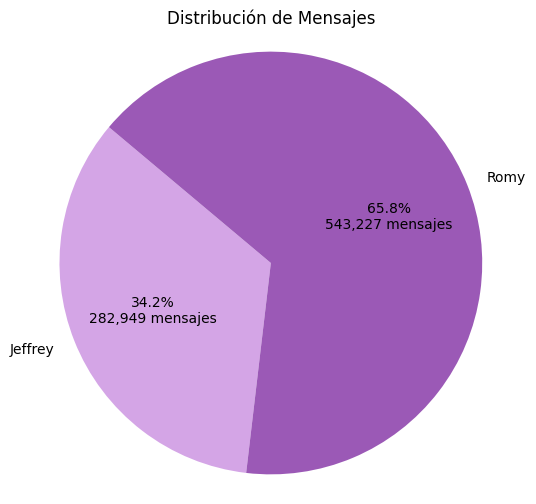

In [8]:
count_of_messages_circular_graph(total_messages)

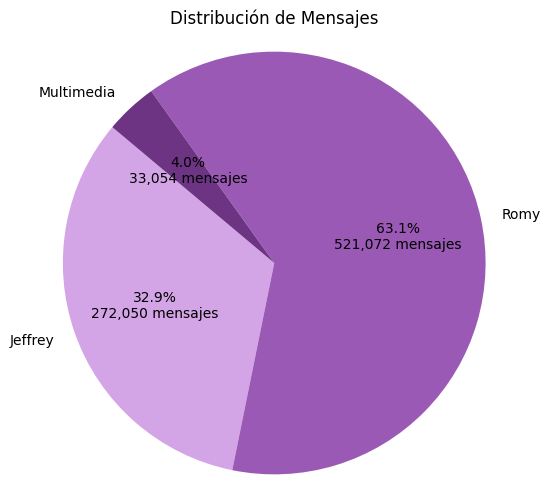

In [9]:
count_of_messages_circular_graph(total_text_messages)

# Palabras más frecuentes

In [5]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeffr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
sw = stopwords.words('spanish')
stoplist = load_text('stoplist.txt')
stoplist = stoplist.split('\n')
stoplist += ['?', '-', ':', ',', '.', '!', '¡', '¿', ';', '(', ')', '«', '»', '—', '“', '”', '…', '°', 'º', '``']

for word in sw:
	if word not in stoplist:
		stoplist.append(word)

print(stoplist)
print(len(stoplist))

['a', 'actualmente', 'adelante', 'además', 'afirmó', 'agregó', 'ahora', 'ahí', 'al', 'algo', 'alguna', 'algunas', 'alguno', 'algunos', 'algún', 'alrededor', 'ambos', 'ampleamos', 'ante', 'anterior', 'antes', 'apenas', 'aproximadamente', 'aquel', 'aquellas', 'aquellos', 'aqui', 'aquí', 'arriba', 'aseguró', 'así', 'atras', 'aunque', 'ayer', 'añadió', 'aún', 'bajo', 'bastante', 'bien', 'buen', 'buena', 'buenas', 'bueno', 'buenos', 'cada', 'casi', 'cerca', 'cierta', 'ciertas', 'cierto', 'ciertos', 'cinco', 'comentó', 'como', 'con', 'conocer', 'conseguimos', 'conseguir', 'considera', 'consideró', 'consigo', 'consigue', 'consiguen', 'consigues', 'contra', 'cosas', 'creo', 'cual', 'cuales', 'cualquier', 'cuando', 'cuanto', 'cuatro', 'cuenta', 'cómo', 'da', 'dado', 'dan', 'dar', 'de', 'debe', 'deben', 'debido', 'decir', 'dejó', 'del', 'demás', 'dentro', 'desde', 'después', 'dice', 'dicen', 'dicho', 'dieron', 'diferente', 'diferentes', 'dijeron', 'dijo', 'dio', 'donde', 'dos', 'durante', 'e', '

In [7]:
def quitar_nombres(lista_texto):
    pattern = r'^(Jeffrey Monja:|ROMINOVICH MI TODOPODEROSA 💜:|Rominovich 💜:)\s*'

    lineas_limpias = []

    for linea in lista_texto:
        if re.match(pattern, linea):
            lineas_limpias.append(re.sub(pattern, '', linea))
        #else:
        #    # Si la línea no cumple el patrón, la imprimimos
        #    print("Línea que no sigue el patrón:", linea)

    return lineas_limpias


In [ ]:
def procesar_texto_optimizado(file_path, stoplist):
    # Convertir stoplist en un conjunto para mejorar la velocidad de búsqueda
    stop_words = set(stoplist)
    
    # Patrón para detectar líneas que siguen el patrón de mensajes con nombres
    pattern = r'^(Jeffrey Monja:|ROMINOVICH MI TODOPODEROSA 💜:)\s*'

    # Cargar y limpiar el texto del archivo
    chat_text = load_text(file_path)
    chat_text = re.sub(r'[\u202f\u00a0]', ' ', chat_text)

    # Procesar cada línea en una sola pasada
    words = []
    for line in chat_text.split('\n'):
        # Solo procesar las líneas que coincidan con el patrón
        if re.match(pattern, line):
            # Quitar el nombre al comienzo de la línea
            line = re.sub(pattern, '', line)
            # Filtrar y agregar palabras que no estén en stop_words
            words.extend([word for word in line.split() if word.lower() not in stop_words])
    
    return words

In [37]:
file_path = ['chat_mother_in_law.txt', 'chat_rominovich.txt']
# file_path = 'test.txt'
lines = process_chat_lines(file_path)
lines = quitar_nombres(lines)
stop_words = set(stoplist)


In [38]:
def count_words(lines, stop_words):
    word_count = {}
    for line in lines:
        line_words = line.split()
        for word in line_words:
            word = word.lower()
            if word in stop_words or len(word) < 3:
                continue
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1
    return word_count


words = count_words(lines, stop_words)

top_words = {k: v for k, v in sorted(words.items(), key=lambda item: item[1], reverse=True)}

In [39]:
print(len(words))

n = 30
primeros_items = list(top_words.items())[:n]
print(primeros_items)

print(words['amor'])

150096
[('jsjs', 40237), ('jsjsjs', 18659), ('amor', 15951), ('sjsj', 15586), ('bebé', 15139), ('sjjs', 14764), ('🥺❤️', 14089), ('❤️✨', 13557), ('xdxd', 12050), ('quiero', 11824), ('jsjsj', 11554), ('amo', 9816), ('❤️🥺', 9741), ('xdd', 8894), ('amorrr', 6489), ('amorrrr', 5331), ('-.-', 5051), ('ayyy', 4814), ('ahhh', 4633), ('jsjsjsj', 4573), ('digo', 4413), ('jeff', 4386), ('mom', 4351), ('vas', 3596), ('mal', 3579), ('jsjsjsjs', 3503), ('dije', 3317), ('you', 3199), ('bueno,', 3187), ('mañana', 3166)]
15951


In [ ]:
def word_count(chat_text):
    # Eliminar las líneas que contienen información de fecha, hora y nombre del remitente
    lines = re.sub(r'\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}\s?[ap]\.?\s?m\.? - ', '', chat_text, flags=re.IGNORECASE)

    # Tokenizar el texto en palabras, ignorando signos de puntuación
    words = re.findall(r'\b\w+\b', lines.lower())

    print(words)

    # Contar la frecuencia de cada palabra
    word_counts = Counter(words)

    return word_counts

# Función principal
def main():
    file_path = 'test.txt'
    chat_text = load_text(file_path)
    word_counts = word_count(chat_text)

    # Mostrar las 10 palabras más comunes
    print("Las palabras más comunes son:")
    for word, count in word_counts.most_common(10):
        print(f'{word}: {count}')

if __name__ == '__main__':
    main()
